# Введение в методы анализа данных. Язык Python.

## Лекция 6. Введение в машинное обучение. EDA.
<br><br><br><br>
__Аксентьев Артем (akseart@ya.ru)__

__Ксемидов Борис (bworkboris@yandex.ru)__
<br>

**Машинное обучение** - написание программ для поиска закономерностей в массиве данных для обучения компьютера решать какую-либо задачу без явного её программирования.

<center>
<img src="data/pipeline.png">
</center>

In [ ]:
# Пример данных для обучения модели для возведения в квадрат
x = [
    [2],
    [3],
    [4]
]
y = [4, 9, 16]

## Как выглядят данные?

<center>
<img src="data/dataset.png" width="600" height="400">
</center>

<center>
<img src="data/house_dataset.png" width="600" height="350">
</center>

Задачи машинного обучения:
- задача бинарной классификации (ответ - некий класс);
- задача многоклассовой классификации;
- задача регрессии (ответ - количественный прогноз).

Примеры алгоритмов машинного обучения:
- линейная регрессия;
- логистическая регрессия;
- SVM;
- решающие деревья;
- и т.д.

Метрики оценки моделей машинного обучения:
- метрики оценки модели бинарной классификации;
- метрики оценки модели многоклассовой классификации;
- метрики оценки модели регрессии.

Подходы машинного обучения:
- обучение с учителем (контролируемое обучение);
- обучение с подкреплением;
- обучения без учителя (неконтролируемое обучение).

# Разведочный анализ данных (EDA)

Основные этапы EDA:
- изучение структуры данных (типы и т.д.);
- выбор наиболее важных переменных (корелляционный анализ);
- обработка пропущенных данных;
- обнаружение отклонений.

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

def set_style():
    COLOR = 'black'
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR

set_style()

In [27]:
df = pd.read_csv("data/cars.csv", index_col=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22702 entries, 0 to 36664
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           22702 non-null  float64
 1   mark           22702 non-null  object 
 2   Mileage        20441 non-null  float64
 3   Model          22702 non-null  object 
 4   Price          22702 non-null  float64
 5   Maximum_power  22702 non-null  float64
 6   Volume         22702 non-null  float64
 7   Engine_volume  22702 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.6+ MB


In [29]:
df.head()

,Year,mark,Mileage,Model,Price,Maximum_power,Volume,Engine_volume
0,2020.0,Mercedes-Benz,0.0,G-Class,12902800.0,249.0,2.9,2925.0
1,2020.0,Mercedes-Benz,0.0,G-Class,15709500.0,330.0,2.9,2925.0
2,2019.0,Mercedes-Benz,15500.0,G-Class,13890000.0,422.0,4.0,3982.0
3,2020.0,Mercedes-Benz,0.0,G-Class,13116000.0,422.0,4.0,3982.0
4,2019.0,Mercedes-Benz,15297.0,G-Class,11450000.0,422.0,4.0,3982.0


In [30]:
df

,Year,mark,Mileage,Model,Price,Maximum_power,Volume,Engine_volume
0,2020.0,Mercedes-Benz,0.0,G-Class,12902800.0,249.0,2.9,2925.0
1,2020.0,Mercedes-Benz,0.0,G-Class,15709500.0,330.0,2.9,2925.0
2,2019.0,Mercedes-Benz,15500.0,G-Class,13890000.0,422.0,4.0,3982.0
3,2020.0,Mercedes-Benz,0.0,G-Class,13116000.0,422.0,4.0,3982.0
4,2019.0,Mercedes-Benz,15297.0,G-Class,11450000.0,422.0,4.0,3982.0
...,...,...,...,...,...,...,...,...
36660,2008.0,Chrysler,180000.0,Sebring,300000.0,172.0,2.4,2360.0
36661,2008.0,Chrysler,141000.0,Sebring,330000.0,189.0,2.7,2736.0
36662,2007.0,Chrysler,222000.0,Sebring,654000.0,172.0,2.4,2360.0
36663,2008.0,Chrysler,165000.0,Sebring,500000.0,189.0,2.7,2736.0


In [31]:
df.columns

Index(['Year', 'mark', 'Mileage', 'Model', 'Price', 'Maximum_power', 'Volume',
       'Engine_volume'],
      dtype='object')

## Пропуски данных

In [15]:
df.isnull().any()

Year             False
mark             False
Mileage           True
Model            False
Price            False
Maximum_power    False
Volume           False
Engine_volume    False
dtype: bool

In [16]:
df.columns[df.isnull().any()].tolist()

['Mileage']

In [17]:
df["Mileage"].isnull().sum()

2261

In [18]:
df = df.dropna()

In [19]:
df.columns[df.isnull().any()].tolist()

[]

In [20]:
df.head()

,Year,mark,Mileage,Model,Price,Maximum_power,Volume,Engine_volume
0,2020.0,Mercedes-Benz,0.0,G-Class,12902800.0,249.0,2.9,2925.0
1,2020.0,Mercedes-Benz,0.0,G-Class,15709500.0,330.0,2.9,2925.0
2,2019.0,Mercedes-Benz,15500.0,G-Class,13890000.0,422.0,4.0,3982.0
3,2020.0,Mercedes-Benz,0.0,G-Class,13116000.0,422.0,4.0,3982.0
4,2019.0,Mercedes-Benz,15297.0,G-Class,11450000.0,422.0,4.0,3982.0


In [21]:
len(df)

20441

## Исследование данных

In [22]:
df["mark"].value_counts()

Mercedes-Benz     1740
BMW               1383
Toyota            1093
Volkswagen        1007
Kia               1006
                  ... 
Race car             3
McLaren              2
ZX                   2
AMC                  2
Scion                2
Name: mark, Length: 84, dtype: int64

<AxesSubplot:ylabel='mark'>

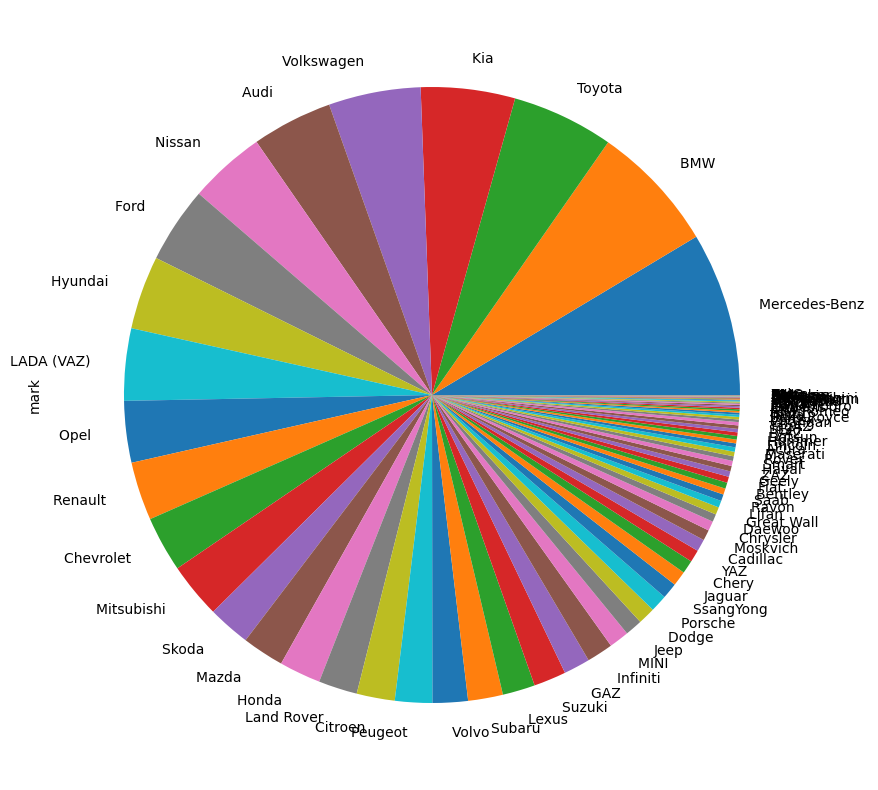

In [34]:
df["mark"].value_counts().plot.pie(figsize=(10, 10))

<AxesSubplot:ylabel='mark'>

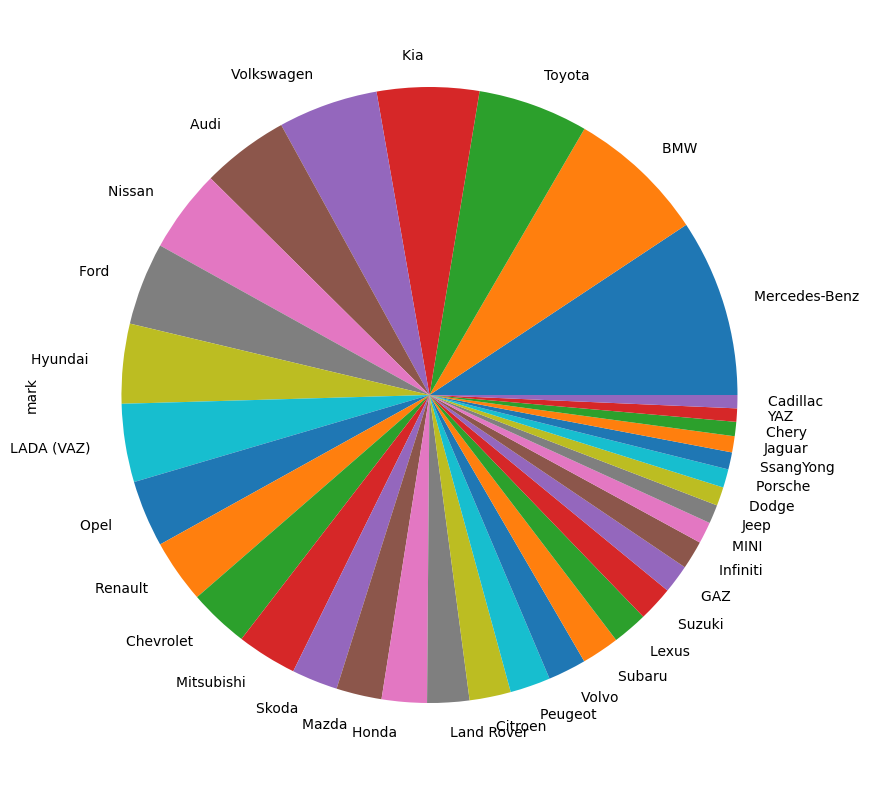

In [35]:
marks = df["mark"].value_counts()
marks[marks > 130].plot.pie(figsize=(10, 10))

In [36]:
df.drop(columns=["mark", "Model"]).corr()

,Year,Mileage,Price,Maximum_power,Volume,Engine_volume
Year,1.000000,-0.444584,0.281040,0.251598,-0.039804,-0.038837
Mileage,-0.444584,1.000000,-0.343239,-0.141807,0.049517,0.043126
Price,0.281040,-0.343239,1.000000,0.553442,0.359892,0.364324
Maximum_power,0.251598,-0.141807,0.553442,1.000000,0.799679,0.802018
Volume,-0.039804,0.049517,0.359892,0.799679,1.000000,0.991118
Engine_volume,-0.038837,0.043126,0.364324,0.802018,0.991118,1.000000


<AxesSubplot:>

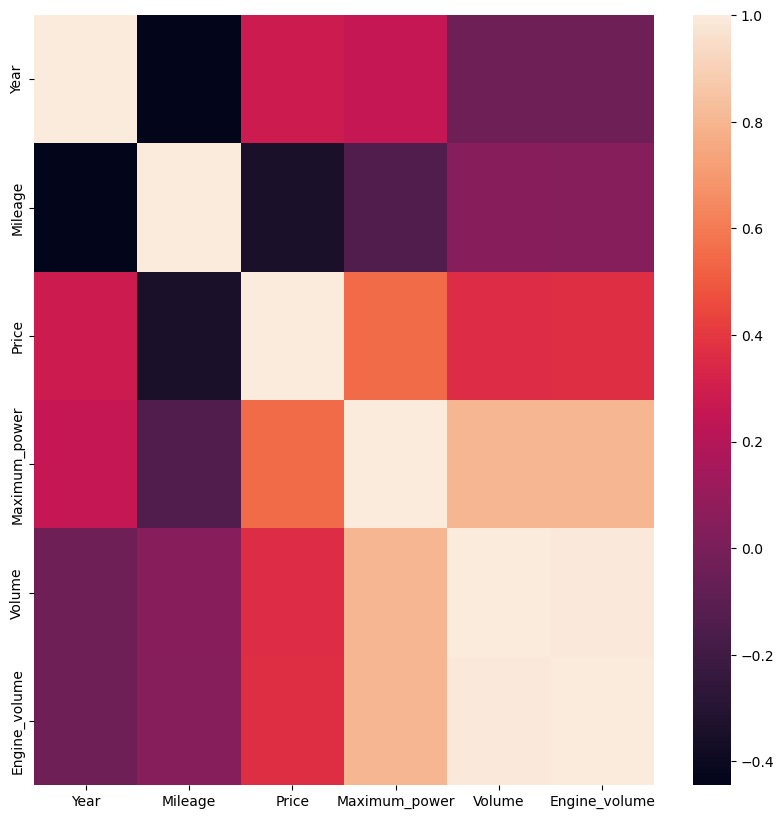

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax)

Описание графика:
- по диагонали - гистограммы (частота того или иного значения признака);
- все кроме диагонали - сэмплы с разными комбинациями значений признаков.

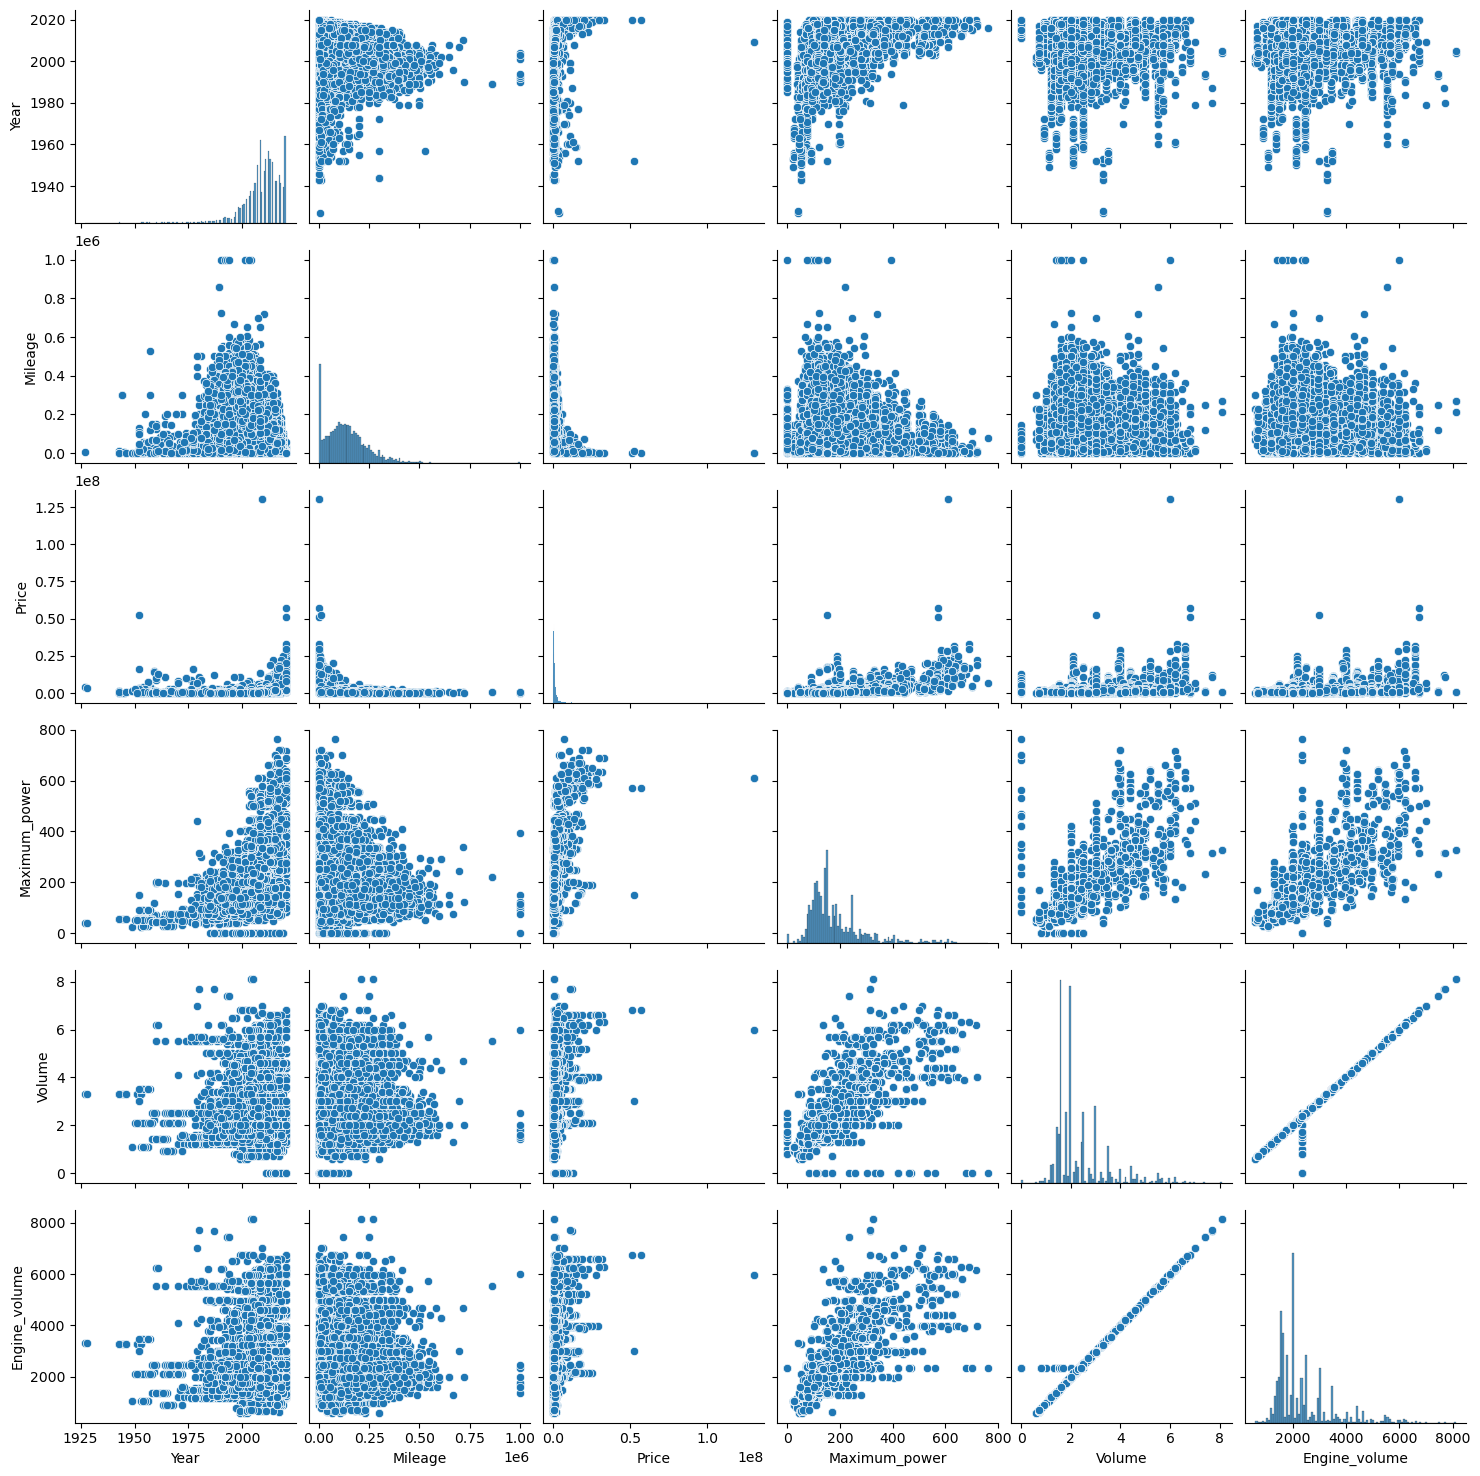

In [38]:
sns.pairplot(df)

<AxesSubplot:>

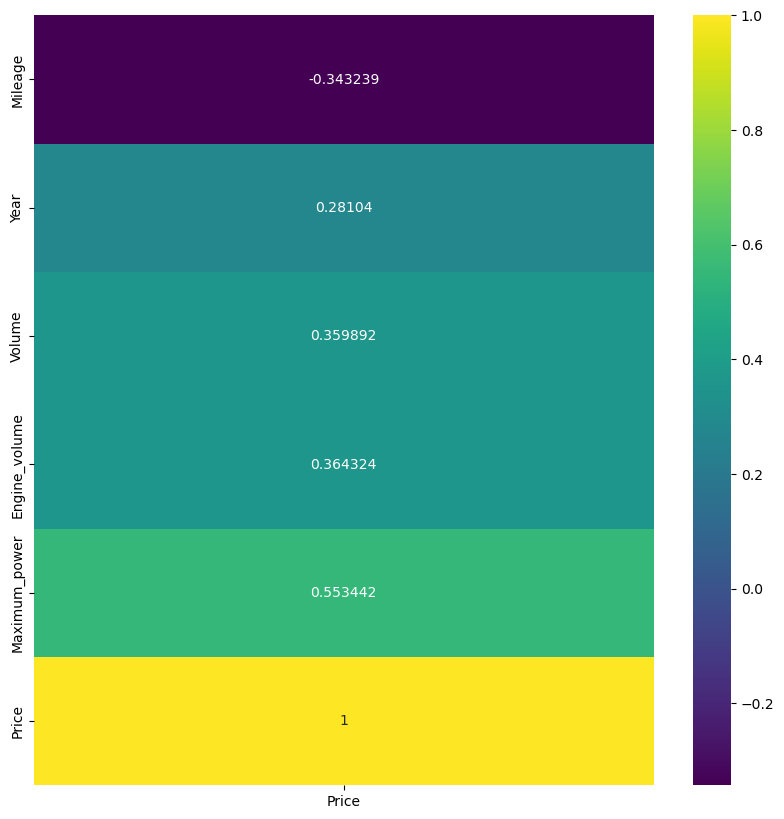

In [39]:
# "Color" is missing

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr()[["Price"]].sort_values(by="Price"), annot=True, fmt="g", cmap='viridis')

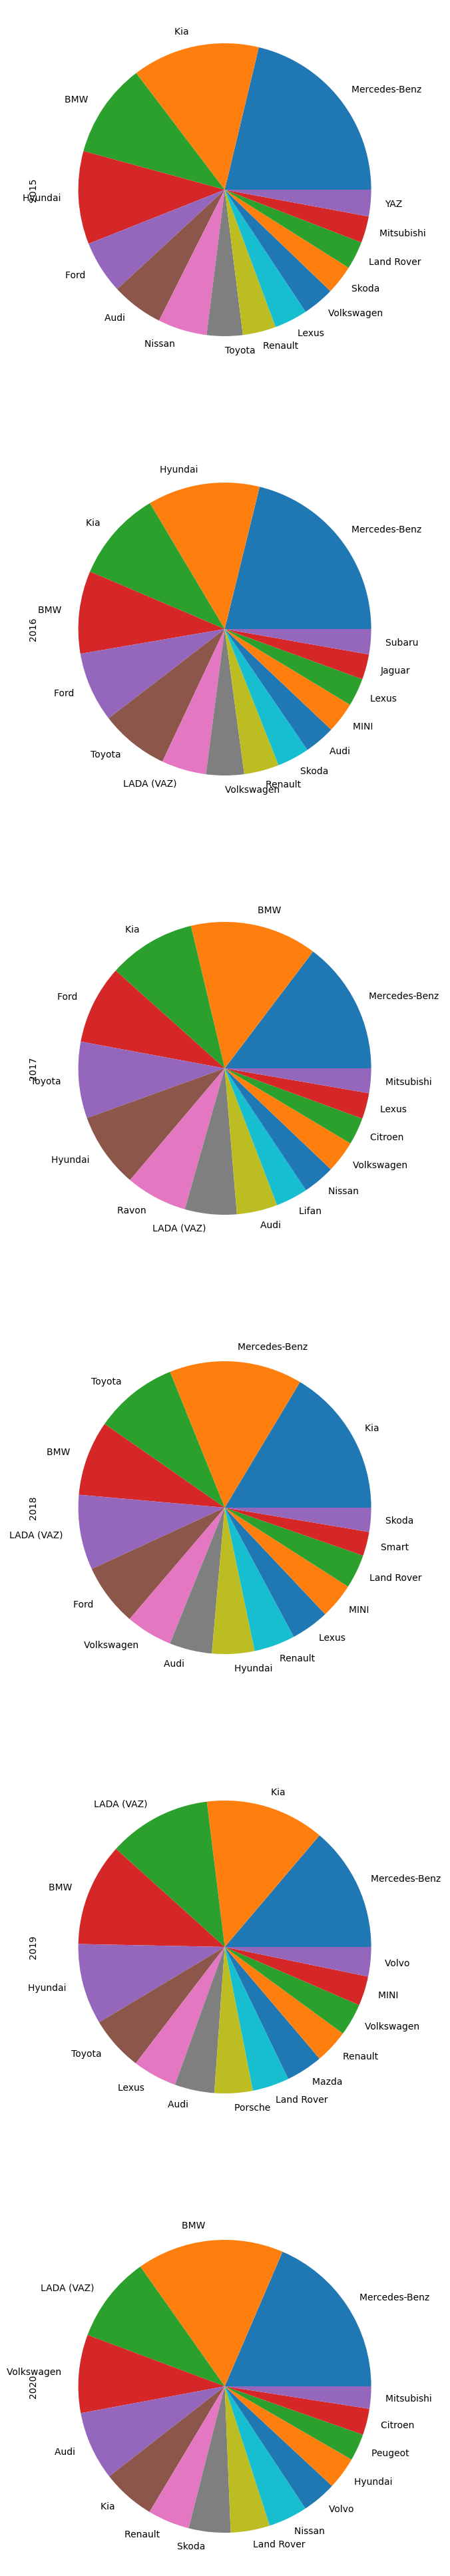

In [40]:
def plot_pie_years(start_year, end_year):
    serie = df.groupby(by=["Year", "mark"])[["Price"]].size().loc[start_year:end_year]

    years = serie.index.get_level_values(0).unique()
    fig, axes = plt.subplots(len(years), 1)

    for ax, year in zip(axes, years):
        serie.loc[(year, )].sort_values(ascending=False).iloc[:15].plot.pie(
             ylabel=str(int(year)), ax=ax, figsize=(50, 50))
        
plot_pie_years(2015, 2020)

## Обнаружений отклонений

Подробнее: https://scikit-learn.org/stable/modules/outlier_detection.html

Медиана - число, которое находится в середине этого набора, если его упорядочить по возрастанию, то есть такое число, что половина из элементов набора не меньше него, а другая половина не больше.

Пример значений признака: {11, 9, 3, 5, 5}.

Сортируем: {3, 5, 5, 9, 11}.

Берем средний элемент: 5.

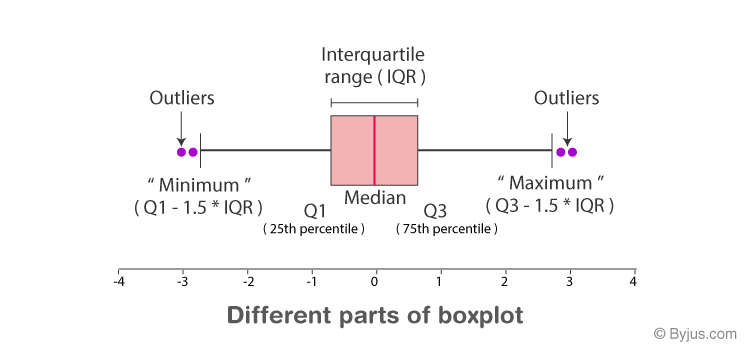


<AxesSubplot:>

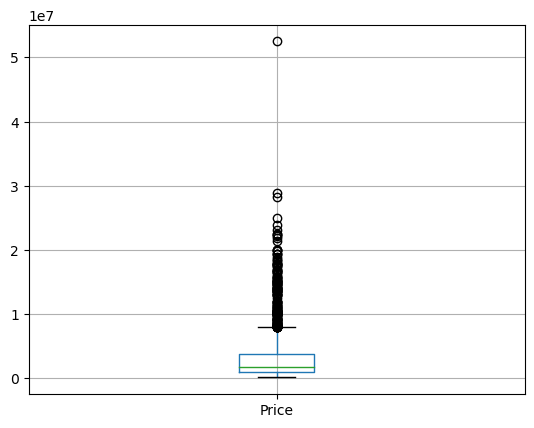

In [52]:
df[df["mark"].str.contains("Mercedes-Benz")].boxplot(column=['Price'])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


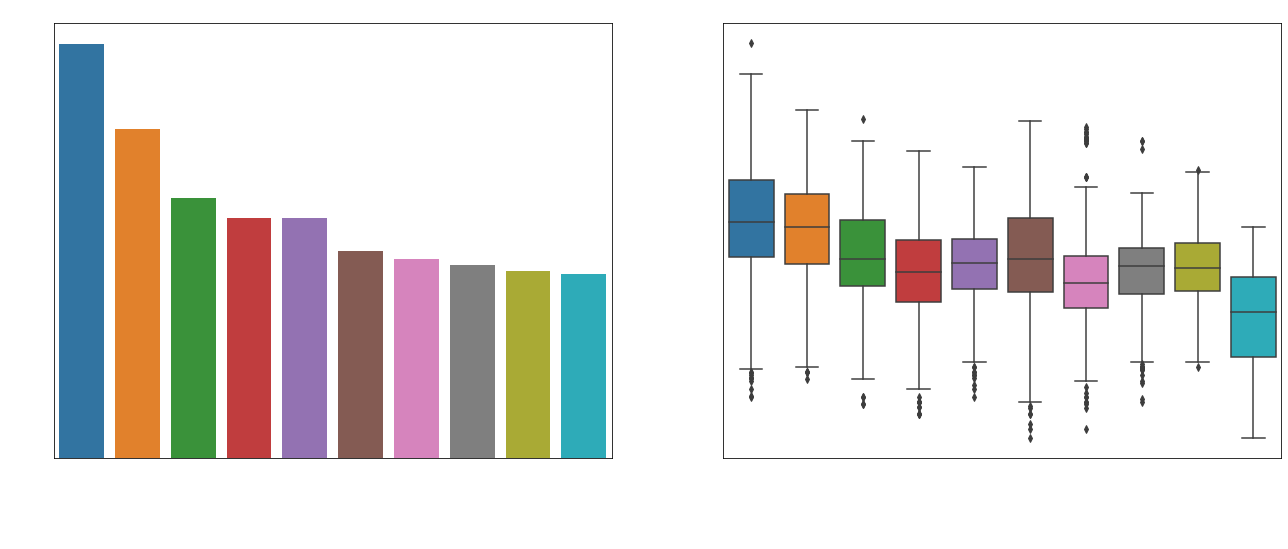

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


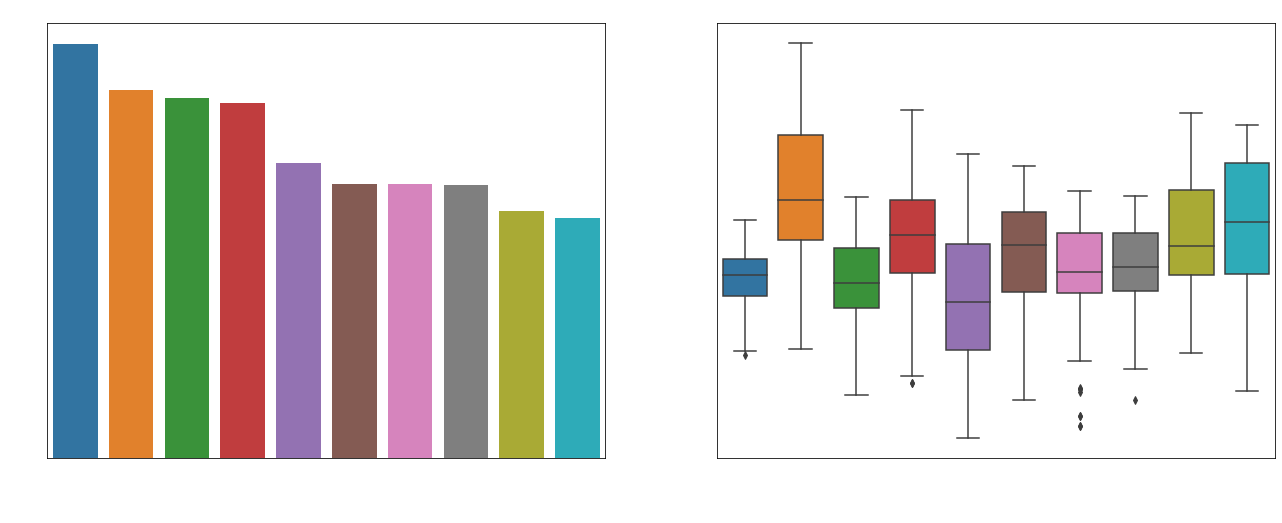

In [134]:
def get_cols(df) -> list:
    '''
    function return list of name numbers and categorials columns
    '''
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

numbers_cols, categorical_cols = get_cols(df)

for column in categorical_cols:
    
    columne_most_freq = df[column].value_counts()[:10].sort_values(ascending=False).index
    
    if '' in columne_most_freq:
        columne_most_freq = columne_most_freq.drop('')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8))    
    
    plt.subplot(1,2,1)
    plt.title(f'{column} Histogram')
    sns.countplot(
            df[df[column].isin(columne_most_freq)][column],
            order=columne_most_freq
    )
    
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title(f'{column} vs Log Price')
    ax = sns.boxplot(
            x=df[df[column].isin(columne_most_freq)][column], 
            y=np.log(df[df[column].isin(columne_most_freq)].Price), 
            order=columne_most_freq
    )
    plt.xticks(rotation=45)

    plt.show()

In [42]:
# 25% перцентиль (см. выше)
q = df["Mileage"].quantile(0.25)

# фильтруем от отклонений
df["Mileage"][df["Mileage"] > q]

118       95344.0
119      102857.0
127       63353.0
217       85408.0
224       62300.0
           ...   
36659    230000.0
36660    180000.0
36661    141000.0
36662    222000.0
36663    165000.0
Name: Mileage, Length: 15315, dtype: float64